Analiza nepremičnin 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Nalaganje podatkov iz CSV datoteke
PODATKI = pd.read_csv('rezultati.csv')
# Poglejmo kako izgledajo podatki (prikazanih je prvih nekaj podatkov)
PODATKI[["size", "price", "obcina"]].head(10)

,size,price,obcina
0,12.0,300.00 EUR,Brežice
1,18.0,250.00 EUR,Ljubljana
2,15.0,270.00 EUR,Novo mesto
3,15.0,180.00 EUR,Ajdovščina
4,20.0,250.00 EUR,Cerknica
5,15.0,200.00 EUR,Celje
6,18.0,240.00 EUR,Ljubljana
7,18.0,400.00 EUR,Dol pri Ljubljani
8,15.0,210.00 EUR,Ajdovščina
9,20.0,550.00 EUR,Koper


Analiza povprečnih cen najema glede na občine

In [ ]:
# Očiščeni podatki o ceni za lažjo obdelavo (odstranili bomo 'EUR')
PODATKI['cena_brez_eur'] = PODATKI['price'].str.replace(' EUR', '')
PODATKI['cena_brez_eur'] = pd.to_numeric(PODATKI['cena_brez_eur'])

# Povprečna cena nastanitev za vsako občino
povprecne_cene = PODATKI.groupby('obcina')['cena_brez_eur'].mean().reset_index()
povprecne_cene = povprecne_cene.rename(columns={'cena_brez_eur': 'povprecna cena (EUR)'})

razvrscene_povprecne_cene = povprecne_cene.sort_values(by = 'povprecna cena (EUR)', ascending=False)
razvrscene_povprecne_cene['povprecna cena (EUR)'] = razvrscene_povprecne_cene['povprecna cena (EUR)'].round(2)

# Podatki, ki smo jih dobili izgledajo tako
razvrscene_povprecne_cene [['obcina', 'povprecna cena (EUR)']].head(10)


,obcina,povprecna cena (EUR)
6,Dol pri Ljubljani,400.00
13,Koper,383.33
23,Piran,366.67
12,Kidričevo,360.00
9,Ig,360.00
16,Ljubljana,323.28
14,Kranj,310.00
36,Škofja Loka,307.50
10,Izola,300.00
21,Miren - Kostanjevica,300.00


Grafični prikaz

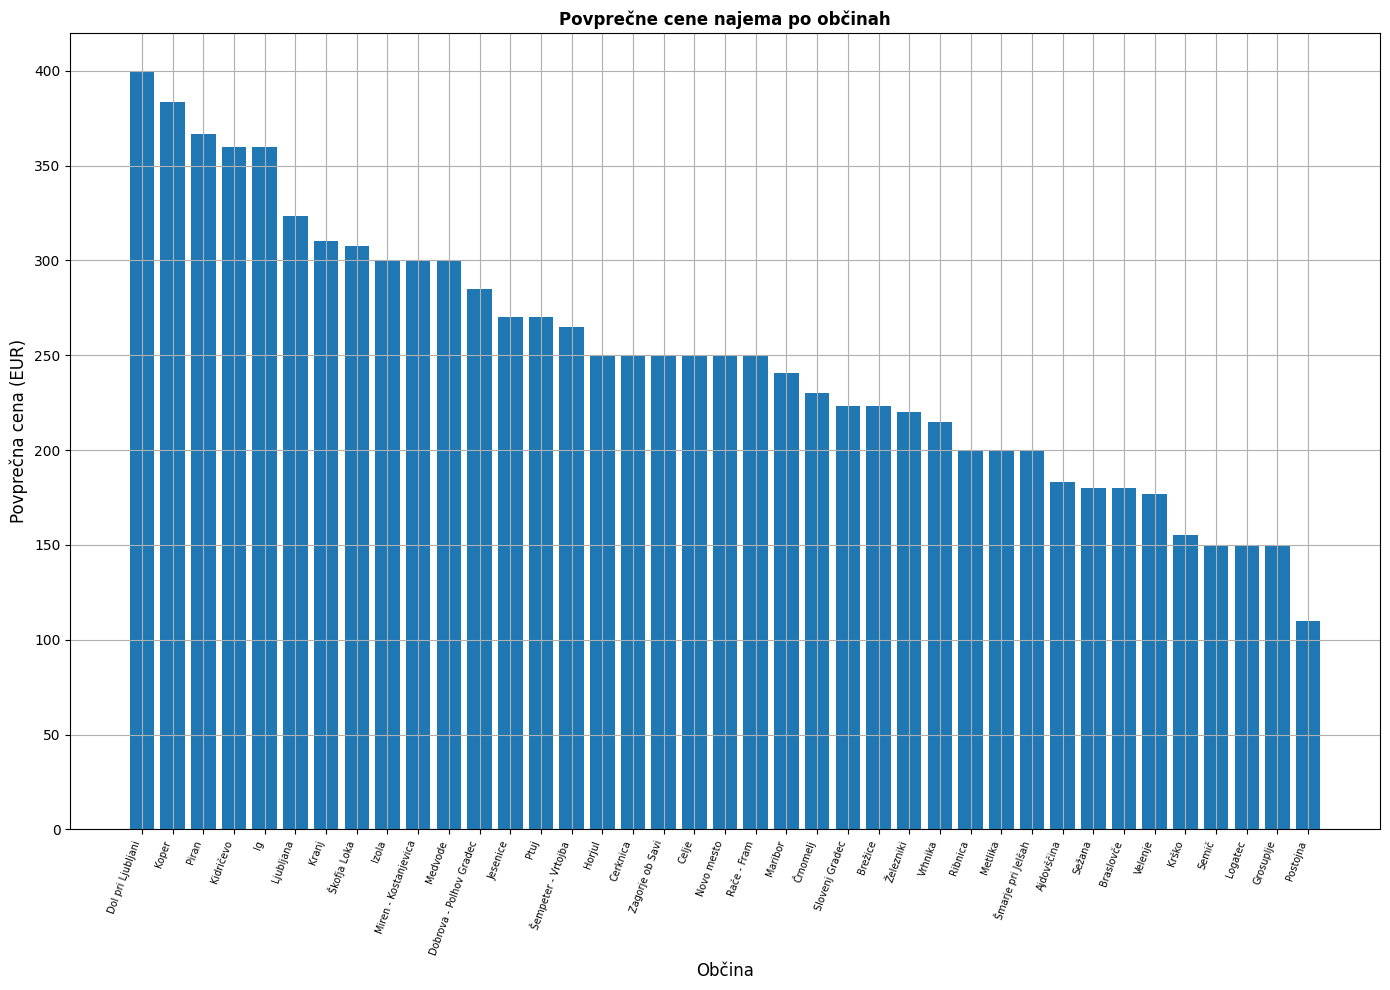

In [ ]:
# Stolpični prikaz
plt.figure(figsize=(14, 10))

plt.bar(razvrscene_povprecne_cene['obcina'], 
        razvrscene_povprecne_cene['povprecna cena'])

plt.title('Povprečne cene najema po občinah', fontweight='bold')
plt.xlabel('Občina', fontsize=12)
plt.ylabel('Povprečna cena (EUR)', fontsize=12)
plt.xticks(rotation=70, ha='right', fontsize=7) 
plt.grid(True)
plt.tight_layout()
plt.show()

Cena na kvadratni meter po občinah

In [ ]:
# Podatke o velikosti pretvorimo v decimalna števila
PODATKI['size'] = pd.to_numeric(PODATKI['size'])

# Izračun cene na m^2
PODATKI['cena_na_m2'] = PODATKI['cena_brez_eur'] / PODATKI['size']

# Glede na občino
povprecna_cena_m2 = PODATKI.groupby('obcina')['cena_na_m2'].mean().round(2).reset_index()
povprecna_cena_m2 = povprecna_cena_m2.sort_values('cena_na_m2', ascending=False)

povprecna_cena_m2 = povprecna_cena_m2.rename(columns={'cena_na_m2': 'cena na m^2 (EUR)'})

# Dobljeni podatki zdaj zgledajo tako
povprecna_cena_m2[['obcina', 'cena na m^2 (EUR)']].head(10)

,obcina,cena na m^2 (EUR)
27,Ribnica,40.00
10,Izola,30.00
8,Horjul,27.78
13,Koper,26.47
5,Dobrova - Polhov Gradec,22.62
6,Dol pri Ljubljani,22.22
23,Piran,21.18
16,Ljubljana,20.03
14,Kranj,19.38
19,Medvode,18.75


Grafični prikaz

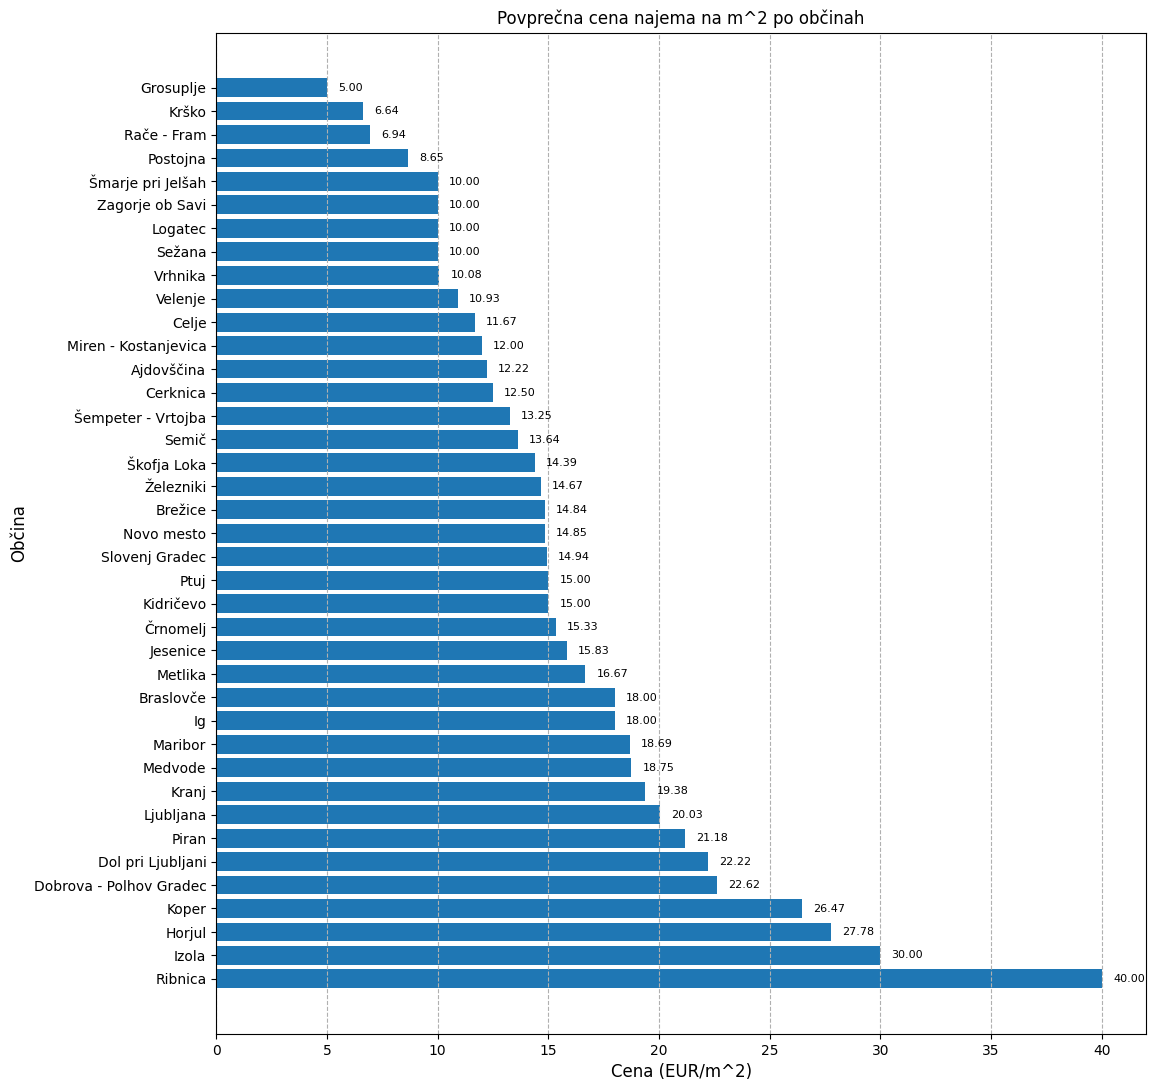

In [ ]:
plt.figure(figsize=(12, 13))
bars = plt.barh(povprecna_cena_m2['obcina'], povprecna_cena_m2['cena na m^2 (EUR)'])

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{width:.2f}', 
             ha='left', va='center', fontsize=8)

plt.title('Povprečna cena najema na m^2 po občinah')
plt.xlabel('Cena (EUR/m^2)', fontsize=12)
plt.ylabel('Občina', fontsize=12)
plt.grid(axis='x', linestyle='--')
plt.show()

Število razpoložljivih stanovanj po občinah